In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import pandas as pd
%matplotlib inline

### Brief Overview 

- The goal of this assignment is to practice some essential probability and hypothesis testing sections.

The assignment consists of two parts: 1- generative models and simulation; and 2- data analysis, interpretation and hypothesis testing. In both problems, you are given bits of information that guide you through solving the problem step-by-step before you are asked to repeat the analysis on a different question.

##### Instructions on answering the questions

1. The only Python modules you can use in this assignment are those imported for you in the top cell. They are `matplotlib`, `numpy`, `scipy`, and `pandas`

2. Your graphs must have titles and axes labels.
  The plot size can be set using `plt.figure(figsize=(a,b))`, where (a,b) are the plot dimensions

# PROBLEM 1
----

### Modeling Revenue from Memberships on a Training Website

* We are interested in modeling sales revenue for a membership-based training website over 2022. In summary, the website charges a monthly fee ($39.99) and enrollees can take as long as they need to complete their training. Students can quit the platform at any time without completing the training.

We know that:
  * Women finish training faster on average than men
  * Women quit less often on average than men 
  * Students have a small chance of dropping each month. As students get close to the end of the training, the probability of dropping decays (decreases), i.e., the longer a student has paid, the less likely they are to give up on their investment and leave the platform.
  
  * The site has seen a steady annual increase in memberships over the past five years. The average yearly increase was 13%, and the standard deviation was 1.4%. Memberships are expected to increase by the same percentage next year.
   * In 2021, 90,316 people enrolled on the training site
  
* We have access to some of the data from previous years. The data is stored in the file `memberships_info.csv` and can be downloaded from the following [URL](https://www.dropbox.com/s/evaaiu1mevw6t3j/memberships_info.csv?dl=1)

   
The data contains the following columns:

| Column    | Description                                    |
|-----------|------------------------------------------------|
| member_id | unique identifier of the member                |
| gender    | M for male and F for female                    |
| status    | C for completed and Q for quit                 |
| mem_duration  | Total duration of the membership in Months |
  


Your task is to develop a generative model, which can be used to estimate revenue for next year. Nevertheless, the model's parameters need to be identified and their underlying distributions hypothesized before their estimated values can be determined. 


### Reading the Data 

* Use `pandas` to read in the data into a variable called `sample_users`
* Based on the data in the tables, what is the proportion of males who completed the training?


In [2]:
# Write your code here 
sample_users = pd.read_csv('/Users/aditijaiswal/Downloads/memberships_info.csv')
sample_users

,member_id,gender,status,mem_duration
0,7Q4IWMC7DE,F,C,10
1,IZO8chWgJZ,M,C,6
2,VKwFA5VINu,F,C,15
3,EfDYcr3Pn8,F,C,13
4,lW1u20Myap,M,C,10
...,...,...,...,...
130056,mJ911HAbHB,M,Q,4
130057,87xWLwwKp2,M,Q,3
130058,hjIO8alt8e,M,Q,11
130059,fj0X08835V,F,Q,3


In [3]:
total_users = sample_users.shape[0]
male_users = ((sample_users['gender'] == 'M') & (sample_users['status'] == 'C')).sum()
print('Proportion of males users in the training: ', male_users/total_users)

Proportion of males users in the training:  0.35349566741759636


### Generative Model for our Simulations

Below is a description of the generative model we will use. Our model will simulate yearly sales in 4 steps:

  1. Simulate a likely number of enrollees based on $\mu=13$ and $\sigma =1.4$ increase from last year (2021).
  
  2. You can simulate whether a particular enrollee will:
  
    2.1 Quit the training: In which case, generate a likely value representing the number of months of enrollment before quitting
      
    2.2 Complete the training: in which case, generate a likely value representing the number of months of enrollment before completing the training

  3. Compute the revenue from memberships based on the total number of months of enrollment simulated for each member.

* This strategy is shown in the figure below

<img src="https://www.dropbox.com/s/xvvof9g36m7pthq/generative_model_diagram.png?dl=1" alt="drawing" style="width:700px;"/>

### Estimating the 95% Confidence Interval of the Simulation

* We are not interested in one value, but rather the interval in which the revenue falls 95% of the time. Therefore, we need to repeat the experiment above a large number of times (say 5,000) to derive the 95% confidence interval.


###  1. Generating the Number of Enrollees

 * As mentioned earlier, the company that provides the training expects the increase in enrollments in 2022 to be comparable to annual increases in the past. The increase has, therefore, a mean $\mu=13$% and a standard deviation of $\sigma =1.4$% 
 * Given that last year's number of enrollees was 90,316, use the Gaussian (normal) distribution to sample a likely number of enrollees for 2022. This number will represent the number of enrollees in a single iteration of the generative model

* Save the value in a variable called `nb_enrollees`
  * Recall that you will need to convert the resulting value to an `int` since the gaussian sample generated is a continuous values  



In [4]:
# Write your code here 
increase = np.random.normal(0.13, 0.014)
print('Percent increase in 2022: ', increase*100)
nb_enrollees = int(90316 * (1 + increase))
nb_enrollees

Percent increase in 2022:  14.406597051136638


103327

### Compute the Proportion of People who Quit Training in the Population of Enrollees

* Use the data in `sample_users` to build a 98% confidence interval of the proportion of enrollees who quit the training before completing. You can generate a single instance of the rate of people who quit by dividing by the number of  people who quit (`status == "Q"` in the data) by the number of people who complete the program (`status == "C"` in the data)

* Will build a 98% confidence interval by computing the proportion in 10,000 bootstrap iteration of the data

* Assing the the the confidence interval tuple to a variable called `quit_prop_conf_int`

  

In [5]:
# Write your code here 
print('Total users: ', total_users)
quitters = sample_users[sample_users['status'] == 'Q'].count()[0]
print('# users who quit: ',quitters)
completers = total_users - quitters
print('# users who completed: ',completers)

Total users:  130061
# users who quit:  46822
# users who completed:  83239


In [6]:
conf_ratio = []

for i in range(10000):
    sample_pop = sample_users.sample(1000, replace=True)
    proportion_bootstrap = sample_pop[sample_pop['status'] == "Q"].shape[0] / sample_pop[sample_pop['status'] == "C"].shape[0]
    conf_ratio.append(proportion_bootstrap)

quit_prop_conf_int = np.percentile(conf_ratio, (1, 99))

quit_prop_conf_int

array([0.48148148, 0.65562914])


### 2. Generating a Radom Quitting Probability

Approximately 98% of the time, the quitting parameter is within the 98% confidence interval. In order to incorporate this uncertainty in our model, we will randomly pick a quitting probability from this confidence interval and use it to estimate the number of people who quit each in iteration our our simualtion
 
  * Use `np.random.uniform(min, max)` to randomly pick a value in the interval.
  * ex. if the bounds of your quit_prop_conf_int are (0.2, 0.3), a possible value is 
  
```python  
  np.random.uniform(0.2, 0.3)
  >>> 0.225
  # this is equivalent to 
  # np.random.uniform(quit_prop_conf_int[0], quit_prop_conf_int[1])
```

Save the value in a variable called `quit_prop`

In [7]:
# Write your code here

quit_prop = np.random.uniform(quit_prop_conf_int[0], quit_prop_conf_int[1])
quit_prop

0.4865811566961078

### 3. Simulating the Number for People Who Quit and Those Who Complete the Training

* Use the variables `nb_enrollees` and `quit_param` to determine the number of people who will complete the training and the number of enrollees who will quit.

* Save the value in `nb_enrollees_finish` and `nb_enrollees_quit` 

  * Recall that the resulting values are integers not floats.
  * Verify that
```
nb_enrollees_finish + nb_enrollees_quit == nb_enrollees
```

In [8]:
# Write your code here 

nb_enrollees_finish = int(nb_enrollees * (1 - quit_prop))
nb_enrollees_quit = nb_enrollees - nb_enrollees_finish
nb_enrollees_finish + nb_enrollees_quit == nb_enrollees

True

### Determining the Number of Payments Enrollees Make Before Quitting

* Here we will be modeling the number of months that a person remains enrolled before eventually quitting

* Recall that the probability of dropping declines as the students get closer to completing the training
  * A person is more likely to quit in the first month than in any other month 
  * The probability of unenrolling during month $t$ is always higher than the probability of unenrolling during month $t+1$
  * The longer the student has paid, the less likely they are to drop out
  
 
* The illustrations A, B and C below are all valid representations of the probability distribution that satisfy the constraints set above.
  * For illustration purposes, the function is represented in the range [1, 10].

<img src="https://www.dropbox.com/s/ys12ubh0mvmyji5/decay.png?dl=1" alt="drawing" style="width:1400px;"/>

### Identifying the Most Likely Parameters

* This three figure above (A, B and C) all represent exponential probability distributions
  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
 
* While we haven't covered this distribution in class, all we need to know is that this distribution has two parameters:
  * `loc`: represents the value at which the function has its maximum
  * `scale`: represents the "inverse rate of decay"
    * the larger the scale, the slower the function is to reach a probability of 0.
  
* In the example above, all three figures were generated with a `loc` of 1 since enrollees are most likely to quit during the first month than in any other month
* Figures A, B and C have different scale parameters; decays (`scale`) of `0.2`, `1` and `200` respectively

* Examples of how to use the exponential probability distribution (`expon`) are given below



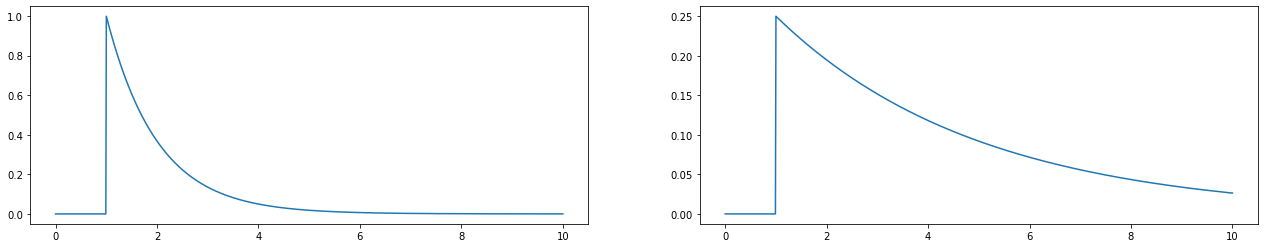

In [9]:
plt.figure(figsize=(22,4))
x = np.linspace(0, 10, 1000)

y_dist_1 = stats.expon(1, 1)
y_dist_2 = stats.expon(1, 4)


plt.subplot(1, 2, 1)
plt.plot(x, y_dist_1.pdf(x), label="$a=0.2$")


plt.subplot(1, 2, 2)
plt.plot(x, y_dist_2.pdf(x), label="$a=1$")



In [10]:
# Sampling 7 values from stats.expon with `loc=1` and `scale=2`

stats.expon(1, 2).rvs(7)

array([2.31934703, 2.96970045, 9.56543702, 3.48723241, 5.98442522,
       2.23223132, 2.57137759])

### Identifying the Scale Parameter that Maximizes the Likelihood (ML)

* We will set `loc=1` since enrollees are likely to quit during the first month. However, what value of `scale` maximizes the log-likelihood of our data?
  
  
* Before we answer this question, compute the log-likelihood of this dataset using a `scale` value of 5
 * Recall that the obsersed data here is the number of months a person remains enrolled before eventually quitting
   * Make sure that your data is the `mem_duration` for individuals with `status=="Q"`

* Also, to compute the log-likelihood of the data [2,1,2,3,4] and `location=1` and `scale=5`, we write:


```python
    log_pdfs = stats.expon(1, 4).logpdf([2,1,2,3,4])
    sum(log_pdfs)
    # or simply 
    # sum(stats.expon(1, 4).logpdf([2,1,2,3,4]))
```

* Note that above we chain operations by first building the distribution using `stats.expon(1, 4)` and, which we subsequently use to call the method `logpdf([2,1,2,3,4])`

In [11]:
# Write your code here 

mem_quit = sample_users.loc[sample_users['status']=='Q']['mem_duration']
log_likelihood = stats.expon(1, 5).logpdf(mem_quit)
sum(log_likelihood)

-127237.50193603487

### Estimating Scale Using the Maximum Likelihood

* Compute and plot the log-likelihood of `scale` values between 1 and 50 given the data

* Your graph should look like the one below.

  * The X-axis represents possible scale params
  * The Y-axis represents the log-likelihood of your data

<img src="https://www.dropbox.com/s/qo5t4qck68pbads/ML.png?dl=1" alt="drawing" style="width:1400px;"/>

* Notes:
  * I have marked the graph to indicate where likelihood is maximal
  * The x-axis ticks are intentionally missing. Make sure yours are not.


Text(0, 0.5, 'log-likelihood')

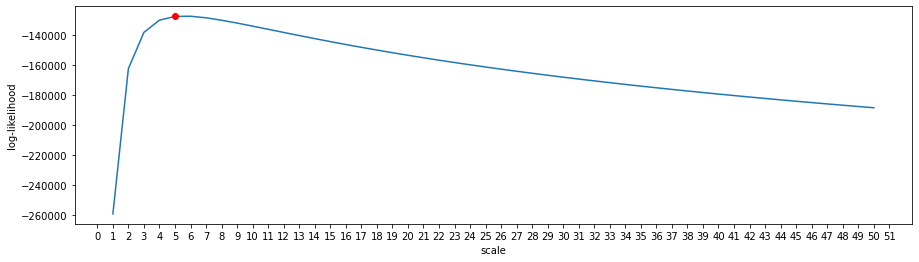

In [12]:
# Write your code here 

log_vals = [sum(stats.expon(1, i).logpdf(mem_quit)) for i in range(1, 51)]
x_val = range(1, 51)
plt.figure(figsize=(15,4))
plt.plot(x_val, log_vals)
plt.xticks(np.arange(0, 52,step = 1))
xmax = np.argmax(log_vals)
ymax = max(log_vals)
plt.plot(xmax, ymax, 'ro')
plt.xlabel("scale")
plt.ylabel("log-likelihood")

### 4. Simulating Users Unenrolling from the Training

* Simulate the number of months users who quit are likely to have stayed on the platform before quitting.

* This can be done by sampling from the exponential using the `loc=1` and the `scale` parameter identified above. E.g.,. if your scale is 4, you can use: 

```python 
    scale =4
    nb_users = 1
    stats.expon(1, scale).rvs(nb_users)
    array([ 2.68001742])
    
```

* The above value tells us the user we simulated stayed on for 2.6 months before quitting. 
  *  To simulate multiple users, simply change the value of nb_users

Since users pay monthly, you can round the values up to the nearest integer
  *I.e., use `np.ceil` to determine the ceiling

* Simulate the number of months enrolled for all users in `nb_enrollees_quit`  
 * Save the value to a variable called `months_paid_before_quitting`.   

In [13]:
# Write your code here 

months_paid_before_quitting = np.ceil(stats.expon(1, xmax).rvs(nb_enrollees_quit))
months_paid_before_quitting

array([ 5., 18.,  4., ...,  2.,  3.,  4.])

### Modeling the Membership Duration for Enrollees who Complete the Training

* We will use a similar approach to derive the duration of enrollment for users who completed the training

  * Here we are not concerned by the gender difference.
    
* Plot a KDE of the duration of enrollment for enrollees who finished the training. 
  * Your graph should look like the following. 

<img src="https://www.dropbox.com/s/it164wz91kr44cz/kde.png?dl=1" alt="drawing" style="width:600px;"/>

(-1.0, 30.0)

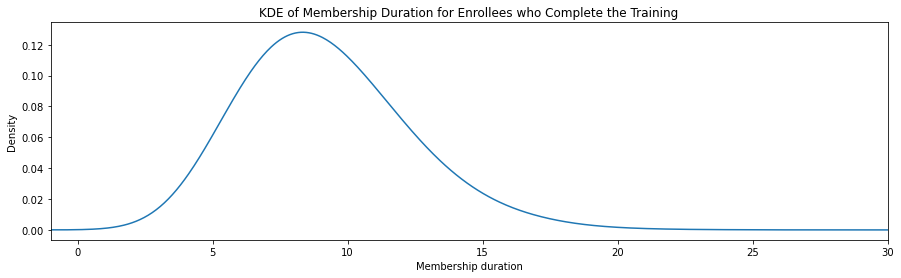

In [14]:
# Write your code here 

mem_completed = sample_users[sample_users['status']=='C']['mem_duration']
plt.figure(figsize = (15,4))
mem_completed.plot.kde(bw_method = 0.4)
plt.xlabel("Membership duration")
plt.title("KDE of Membership Duration for Enrollees who Complete the Training")
plt.xlim([-1, 30])

### Visually identifying mean training completion time

* Based on the KDE above, how long does it take, on average, to complte the training?



In [15]:
### Write your answer here

np.mean(mem_completed)

9.178474032604909

So, it takes approximately 9 years.

### Modeling the Membership Duration for Enrollees who Complete the Training - Cont'd 


* Searching online for similar-looking probability distributions, you find that your KDE resembles a gamma distribution. 
  
   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html

* The gamma distribution takes a single parameter $a$ called the shape parameter.
  * See the documentation for `stats.gamma` in the `scipy` package

* Below are a couple of examples of usage of `stats.gamma`. The first was generated with $a=2$ and the second with $a=8$
  
<img src="images/two_gammas.png" alt="drawing" style="width:1000px;"/>


### Computing the Maximum Likelihood Value of the Parameter $a$

* Use the Maximum Likelihood to identify the value of the parameter $a$ that maximizes the log-likelihood 
    
  * Compute and plot the log-likelihood for the values between 1 and 25
  
    * The X-axis represents possible distribution params
    * The Y-axis represents the log-likelihood of your data
  * Recall that tour data consists of the `mem_duration` for users where `status == "C"`
  
* Notes:
  * I clearly marked the graph to indicate where likelihood is maximal
  * The x-axis ticks are intentionally missing. Make sure yours are not.
  * You can  use the `logpdf` directly on the `gamma(x)` object 
  
<img src="https://www.dropbox.com/s/dahd99mz258curq/ML_gamma.png?dl=1" alt="drawing" style="width:800px;"/>



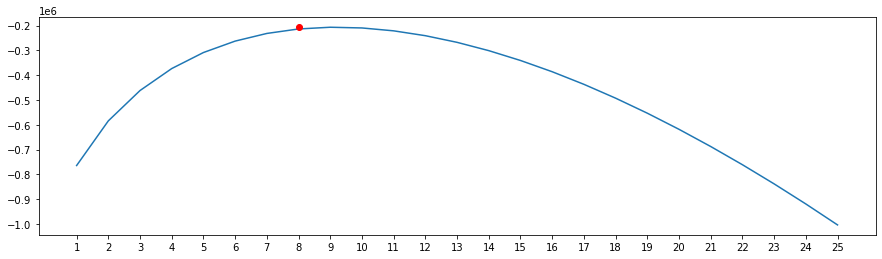

In [16]:
# Write your code here

mem_completed = sample_users[sample_users['status']=='C']['mem_duration']
loglike = []
for i in range(25):
    loglike.append(sum(stats.gamma(i+1).logpdf(mem_completed)))
    
plt.figure(figsize=(15, 4))
x = np.linspace(1,25,25)
plt.plot(x, loglike)

xmax = np.argmax(loglike)
ymax = max(loglike)
plt.xticks(np.arange(1,26,step=1))
plt.plot(xmax,ymax,'ro')

### Computing the Maximum Likelihood Value of the Parameter $a$ - Cont'd


* What is the value that maximizes the likelihood?
* Does this value align with what you observed after inspecting rhe KDE graph above?



In [17]:
# Write you code here 

np.argmax(loglike)

8

### Write you answer here 

It almost matches the previous KDE value.

### 5. Simulating Users Completing the Training


* Using the gamma distribution and the parameter $a$ determined above, simulate the number of months it takes users to finish the training. To simulate the number of months a user may have remained unrolled before completing the training we simply sample from the gamma using the parameter $a$ identified above.

* E.g., for $a = 5$, you can use: 

```python 
    scale =4
    nb_users = 1
    stats.gamma(1, months_paid_before_completion).rvs(nb_users)
    array([ 5.112342])
    
```

* According to the value above, the simulated student stayed on for 5.1 months before quitting 
  * Change the value of `nb_users` to simulate multiple users

* Since users pay monthly, round up the values to the nearest integer
  * I.e., compute the ceiling using `np.ceil`

* Simulate the number of months enrolled for all users in `nb_enrollees_finish`  
 * Save the values to a variable called `months_paid_before_finishing`

In [18]:
# Write your code here 

months_paid_before_completion = 9
months_paid_before_finishing = np.ceil(stats.gamma(months_paid_before_completion).rvs(nb_enrollees_finish))
months_paid_before_finishing

array([10., 10.,  7., ..., 10.,  9.,  6.])

### 6. Simulating Revenue for a Single Iteration

* Compute the total revenue for this iteration as the total number of months paid by users who completed the training and those who quit, times the monthly fee.
  * The total number of months of enrollement for users who completed the training is saved in `months_paid_before_finishing`
  * The total number of months of enrollement for users who did not complete the training is saved in `months_paid_before_quitting`
  * The monthly fee is 39.99



In [19]:
# Write you code here

total_revenue = (sum(months_paid_before_finishing) + sum(months_paid_before_quitting)) * 39.99
total_revenue

33226931.19

### Build a 95% Confidence Interval for the Revenue

* Repeat the simulation above 5000 times to build a confidence interval. The steps you'll need to repeat are those described in text cells with the following headers:
    
  1. Generating the Number of Enrollees
  2. Generating a Radom Quitting Probability 
  3. Simulating the Number for People Who Quit and Those Who Complete the Training 
  4. Simulating Users Unenrolling from the Training
  5. Simulating Users Completing the Training
  6. Simulating Revenue for a Single Iteration


    
* The computation may take a few minutes to complete

In [20]:
# Write you code here

simulation_array = np.zeros((5000,))
for x in range(5000):
    
    # get number of enrollees
    percent_increase = np.random.normal(0.13, 0.014)
    nb_enrollees = int(90316 * (1 + percent_increase))
    
    # sample a random quit prop
    quit_prop = np.random.uniform(quit_prop_conf_int[0], quit_prop_conf_int[1])
    
    # get number of enrollees who quit
    nb_enrollees_quit = int(quit_prop * nb_enrollees)
    
    # get number of enrollees who finish
    nb_enrollees_finish = int((1 - quit_prop) * nb_enrollees)

    # compute # months payed before quitting
    months_paid_before_quitting = np.ceil(stats.expon(1, 6).rvs(nb_enrollees_quit))
    
    # compute # months payed before finishing
    months_paid_before_finishing = np.ceil(stats.gamma(1, months_paid_before_completion).rvs(nb_enrollees_finish))
    
    # compute the revenue and add value to some array
    simulation_array[x] = (sum(months_paid_before_finishing) + sum(months_paid_before_quitting)) * 39.99


conf_interval = np.percentile(simulation_array, (2.5, 97.5) ) 
print("95 %confidence interval generated for revenue: ", conf_interval)

95 %confidence interval generated for revenue:  [34612434.7275  37564387.55475]


### Taking into account gender differences 

* Repeat the analysis above while taking into consideration the differences between males and females. To do so, you'll need two additional parameters:

  * the proportion of males/females in the population of enrollees who quit the training, call it `male_female_prop_quit`
     * This is the parameter that you'll use to decide whether the person who unenrolls is a Male or Female

  * The proportion of males to females in the population of enrollees who complete the training, call it `male_female_prop_finish`
    * This is the parameter that you'll use to decide whether the person who unenrolls is a man or a woman.

* Rather than having a single parameter `scale` for the inverse decay of the exponential distribution, you will now have two parameters, one for males and a second for females
* Rather than having a single shape parameter $a$ for gamma distribution, you will now have two parameters, one for males and a second for females



In [21]:
# Write you code here 

male_prop_quit = len(sample_users[sample_users['gender']=='M'][sample_users['status']=='Q']) / len(sample_users[sample_users['status'] == 'Q'])
male_prop_finish = len(sample_users[sample_users['gender']=='M'][sample_users['status']=='C']) / len(sample_users[sample_users['status'] == 'C'])
female_prop_quit = len(sample_users[sample_users['gender']=='F'][sample_users['status']=='Q']) / len(sample_users[sample_users['status'] == 'Q'])
female_prop_finish = len(sample_users[sample_users['gender']=='F'][sample_users['status']=='C']) / len(sample_users[sample_users['status'] == 'C'])
print('male_prop_quit:',male_prop_quit)
print('male_prop_finish:',male_prop_finish)
print('female_prop_quit:',female_prop_quit)
print('female_prop_finish:',female_prop_finish)

male_prop_quit: 0.647131690231088
male_prop_finish: 0.5523372457622028
female_prop_quit: 0.35286830976891204
female_prop_finish: 0.44766275423779717


/var/folders/65/zjdkrmxs3qnd_z9_8zt_vpr80000gn/T/ipykernel_30656/1765082343.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_prop_quit = len(sample_users[sample_users['gender']=='M'][sample_users['status']=='Q']) / len(sample_users[sample_users['status'] == 'Q'])
/var/folders/65/zjdkrmxs3qnd_z9_8zt_vpr80000gn/T/ipykernel_30656/1765082343.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_prop_finish = len(sample_users[sample_users['gender']=='M'][sample_users['status']=='C']) / len(sample_users[sample_users['status'] == 'C'])
/var/folders/65/zjdkrmxs3qnd_z9_8zt_vpr80000gn/T/ipykernel_30656/1765082343.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_prop_quit = len(sample_users[sample_users['gender']=='F'][sample_users['status']=='Q']) / len(sample_users[sample_users['status'] == 'Q'])
/var/folders/65/zjdkrmxs3qnd_z9_8zt_vpr80000gn/T/ipykernel_30656/1765082343.py:6: Us

In [22]:
users_quit = sample_users[sample_users['status'] == 'Q']
male_female_prop_quit = []

for i in range(5000):
    sample_mf = users_quit.sample(1000, replace = True)
    num_males = sample_mf[sample_mf['gender'] == 'M'].shape[0]
    num_females = sample_mf[sample_mf['gender'] == 'F'].shape[0]
    
    male_female_prop_quit.append(num_males/num_females)

quit_male_female = np.percentile(male_female_prop_quit, (1,99))
quit_male_female

array([1.57731959, 2.13479624])

In [23]:
users_comp = sample_users[sample_users['status'] == 'C']
male_female_prop_finish = []

for i in range(5000):
    sample_mf = users_comp.sample(1000, replace = True)
    num_males = sample_mf[sample_mf['gender'] == 'M'].shape[0]
    num_females = sample_mf[sample_mf['gender'] == 'F'].shape[0]
    
    male_female_prop_finish.append(num_males/num_females)

comp_male_female = np.percentile(male_female_prop_finish, (1,99))
comp_male_female

array([1.05761317, 1.43309002])

In [24]:
mem_q_male = users_quit[sample_users['gender'] == 'M']['mem_duration']
mem_q_female= users_quit[sample_users['gender'] == 'F']['mem_duration']

like_male = []
like_female = []
    
for i in range(50):
    logml_male = sum(stats.expon(loc=1,scale=i+1).logpdf(mem_q_male))
    logml_female = sum(stats.expon(loc=1,scale=i+1).logpdf(mem_q_female))
    like_male.append(logml_male)
    like_female.append(logml_female)

/var/folders/65/zjdkrmxs3qnd_z9_8zt_vpr80000gn/T/ipykernel_30656/2606668173.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mem_q_male = users_quit[sample_users['gender'] == 'M']['mem_duration']
/var/folders/65/zjdkrmxs3qnd_z9_8zt_vpr80000gn/T/ipykernel_30656/2606668173.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mem_q_female= users_quit[sample_users['gender'] == 'F']['mem_duration']


([<matplotlib.axis.XTick at 0x7ff4f3813700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

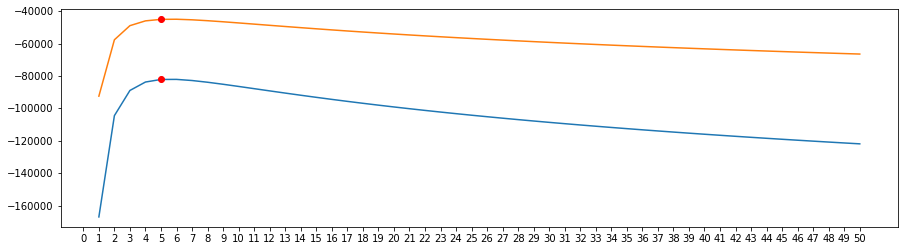

In [25]:
plt.figure(figsize=(15,4))
x = range(1,51)
plt.plot(x, like_male, label = 'male')
plt.plot(x, like_female, label = 'female')

xmax_expon_male = np.argmax(like_male)
xmax_expon_female = np.argmax(like_female)
ymax_male = max(like_male)
ymax_female = max(like_female)
plt.plot(xmax_expon_male, ymax_male, 'ro')
plt.plot(xmax_expon_female, ymax_female, 'ro')
plt.xticks(np.arange(0, 51,step=1))

([<matplotlib.axis.XTick at 0x7ff501ab6ac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

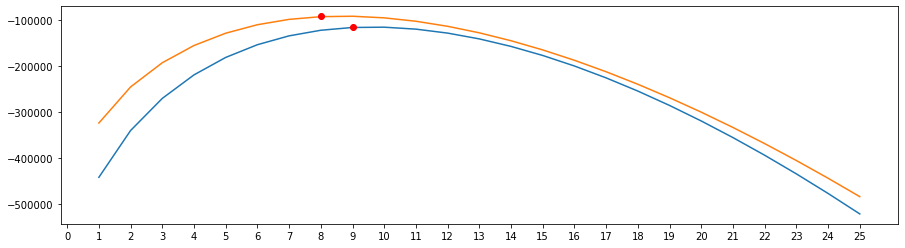

In [26]:
mem_completed_male = sample_users.loc[sample_users['gender'] == 'M'].loc[sample_users['status'] == 'C']['mem_duration']
mem_completed_female = sample_users.loc[sample_users['gender'] == 'F'].loc[sample_users['status'] == 'C']['mem_duration']
logml_male = []
logml_female = []
for i in range(25):
    val_male = sum(stats.gamma(i+1).logpdf(mem_completed_male))
    logml_male.append(val_male)
    val_female = sum(stats.gamma(i+1).logpdf(mem_completed_female))
    logml_female.append(val_female)
    
plt.figure(figsize=(15,4))
x = range(1,26)
plt.plot(x, logml_male, label = 'male')
plt.plot(x, logml_female, label = 'female')

xmax_gamma_male = np.argmax(logml_male)
xmax_gamma_female = np.argmax(logml_female)
ymax_male = max(logml_male)
ymax_female = max(logml_female)
plt.plot(xmax_gamma_male, ymax_male, 'ro')
plt.plot(xmax_gamma_female, ymax_female, 'ro')
plt.xticks(np.arange(0, 26,step=1))

In [27]:
total_revenue = []
male_revenue = []
female_revenue = []

for i in range(5000):
    
    percentage_increase = np.random.normal(0.13, 0.014) 
    nb_enrollees = int(90316 * (1 + percentage_increase)) 
    
    quit_prop = np.random.uniform(quit_prop_conf_int[0], quit_prop_conf_int[1])
    
    mf_quit_ratio = np.random.uniform(quit_male_female[0], quit_male_female[1])
    mf_comp_ratio = np.random.uniform(comp_male_female[0], comp_male_female[1])
    
    nb_enrollees_quit = int(quit_prop * nb_enrollees)
    nb_enrollees_finish = int((1 - quit_prop) * nb_enrollees)
    
    nb_quit_male = int(nb_enrollees_quit * (mf_quit_ratio / (mf_quit_ratio + 1)))
    nb_quit_female = nb_enrollees_quit - nb_quit_male
    
    nb_finish_male = int(nb_enrollees_finish * (mf_comp_ratio / (mf_comp_ratio + 1)))
    nb_finish_female = nb_enrollees_finish - nb_finish_male
    
    months_paid_before_quitting_male = np.ceil(stats.expon(1, xmax_expon_male).rvs(nb_quit_male))
    months_paid_before_quitting_female = np.ceil(stats.expon(1, xmax_expon_female).rvs(nb_quit_female))
    
    months_paid_before_finish_male = np.ceil(stats.gamma(1, xmax_gamma_male).rvs(nb_finish_male))
    months_paid_before_finish_female = np.ceil(stats.gamma(1, xmax_gamma_female).rvs(nb_finish_female))

    rev_male = np.sum(np.sum(months_paid_before_quitting_male) + np.sum(months_paid_before_finish_male)) * 39.99
    rev_female = np.sum(np.sum(months_paid_before_quitting_female) + np.sum(months_paid_before_finish_female))  * 39.99
    rev_tot = rev_male + rev_female
    total_revenue.append(rev_tot)
    male_revenue.append(rev_male)
    female_revenue.append(rev_female)

conf95_tot = np.percentile(total_revenue, (2.5, 97.5))
conf95_male = np.percentile(male_revenue, (2.5, 97.5))
conf95_female = np.percentile(female_revenue, (2.5, 97.5))

print("95% confidence interval for total revenue: ", conf95_tot)
print("95% confidence interval for male revenue: ", conf95_male)
print("95% confidence interval for female revenue: ", conf95_female)

95% confidence interval for total revenue:  [31397424.681      34563787.89225001]
95% confidence interval for male revenue:  [18884353.731 21409146.375]
95% confidence interval for female revenue:  [11656201.221 14148917.886]


### Conclusion


* Which do you think is the most accurate model, the one that takes into account the gender differences of the one that does not? Justify your answer.




### Answer

Both are giving almost same results but I think the one which considers gender differences is a better model so as to clearly understand and differentiate how each gender participate in the training and affects the study.

# PROBLEM 2
----

###  Average Medicare Payment and Hypothesis Testing 

* We have access to the average Medicare payment made by the Federal government to over 6,000 hospitals nationwide. Medicare payments are categorized according to `DRG Definitions`, which are diagnostic categories that describe the service provided. For instance, the average Medicare payment at  THE QUEENS MEDICAL CENTER for the diagnostic category "917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC" was $15,305.21.

* We are interested in comparing the average payment across states to see if they are similar or not, regardless of diagnostic category. Naturally, by different, we are interested in seeing whether the difference is statistically significant.





### Loading  the data
* The data is stored in `hospital_charge_data.csv` available at the following [URL](https://www.dropbox.com/s/zqf56enddz6mhlf/hospital_charge_data.csv?dl=1)


* Load the data into a variable called `payment_data`
  * Select only the columns `['DRG Definition', "Provider Name", 'Provider State', 'Average Medicare Payments']`
  * Rename these columns as `['diagnostic', 'name', 'state', 'avg_medicare_payment']`



In [28]:
# Write you code here

payment_data = pd.read_csv('/Users/aditijaiswal/Downloads/hospital_charge_data.csv')
payment_data

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54


In [29]:
payment_data.rename(columns = {'DRG Definition': 'diagnostic', "Provider Name": 'name', 'Provider State': 'state', 'Average Medicare Payments': 'avg_medicare_payment'}, inplace=True)
payment_data

,diagnostic,Provider Id,name,Provider Street Address,Provider City,state,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,avg_medicare_payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54


### Average Medicare Payment Value

* Compute the mean average medicare payment value for Idaho (ID) and Hawaii (HI). 

* Based on the observed means, do you believe that there is a statistically significant difference in medicare payments between the two states? Justify your answer.

In [30]:
# Write you code here

payment_data.groupby("state").mean().loc[["HI", "ID"]]['avg_medicare_payment']

state
HI    10967.475045
ID     8461.977514
Name: avg_medicare_payment, dtype: float64

There isn't enough information to say whether the difference between the two values is statiscally significant or not.

# FYI: Which are the Costliest Categories

* Post-surgery infections are the categories with the highest Medicare payments cost,
  * The most expensive category is `853 - INFECTIOUS & PARASITIC DISEASES W O.R. P....` 
    * there were 15 discharges in NY's  WESTCHESTER MEDICAL CENTER, with an average Medicare payment of $133,177. 
    
    * there were 86 discharges in LA's CEDARS-SINAI MEDICAL CENTER with an average medicare payment of $87,437
  
* The overall cost of surgical site infection alone in the US is estimated at $3.5 to $10 billion annually.

In [31]:
data = pd.read_csv('/Users/aditijaiswal/Downloads/hospital_charge_data.csv')
data[data["DRG Definition"].str.contains("INFECTIOUS")].sort_values("Average Medicare Payments", ascending=False).head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
150793,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,330234,WESTCHESTER MEDICAL CENTER,100 WOODS RD,VALHALLA,NY,10595,NY - White Plains,15,517381.33,140255.26,133177.26
150143,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,90003,HOWARD UNIVERSITY HOSPITAL,2041 GEORGIA AVE NW,WASHINGTON,DC,20060,DC - Washington,14,234174.35,99067.50,95701.42
150057,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,31,496784.25,95302.74,94614.03
150088,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,50625,CEDARS-SINAI MEDICAL CENTER,8700 BEVERLY BLVD,LOS ANGELES,CA,90048,CA - Los Angeles,68,551524.07,88651.75,87437.85
150024,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,31,313814.64,87857.64,86398.70


### Skewed Data

* The payments data in Idaho and Hawaii are highly skewed and most payments are below $15k$, with some up to $60k$ in both states. See graphs below.



Text(0.5, 1.0, 'avg_medicare_payment in Hawaii')

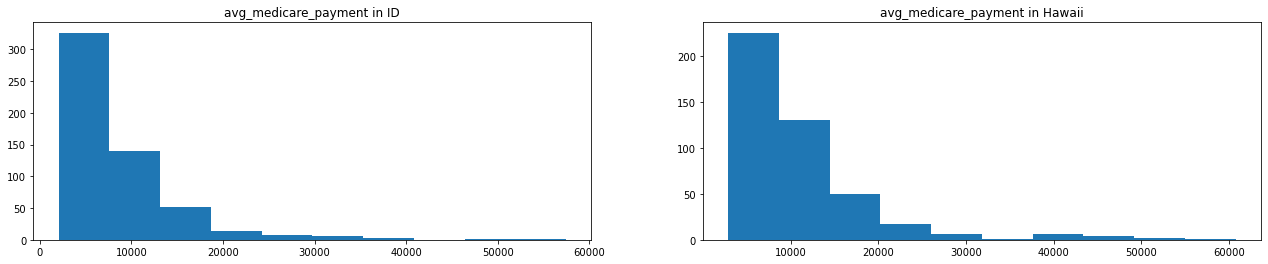

In [32]:
plt.figure(figsize=(22,4))
plt.subplot(1, 2, 1)
_ = plt.hist(payment_data[payment_data["state"] == "ID"]["avg_medicare_payment"])
plt.title("avg_medicare_payment in ID")
plt.subplot(1, 2, 2)
_ = plt.hist(payment_data[payment_data["state"] == "HI"]["avg_medicare_payment"])
plt.title("avg_medicare_payment in Hawaii")

### Log-Transforming the Data


* As discussed in class, data which follow bell-shaped distributions tend to be easier to work with in hypothesis testing.
    * Bootstrapping is not recommended with skewed data.

* Compute the `log` (base 10) of the `avg_medicare_payment` column and save the result to a new column called `log_avg_medicare_payment`

In [33]:
# Write you code here

payment_data["log_avg_medicare_payment"] = np.log(payment_data["avg_medicare_payment"]) 
payment_data

,diagnostic,Provider Id,name,Provider Street Address,Provider City,state,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,avg_medicare_payment,log_avg_medicare_payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,8.468786
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,8.512524
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,8.401511
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,8.325829
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,8.487031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39,8.029886
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72,7.882209
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36,8.308534
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54,8.831791


# Plotting the Hawaii KDE

* Plot the `log_avg_medicare_payment` KDE for Hawaii 
    
* Your curve should look like the one below

* Notice that: 
  * The KDE is smooth (as opposed to having jagged peaks)
   * The bandwidth was selected so that the range (x-axis) is mimized

* In the example below, x- and y-axis labels are missing. Your final graph should be labeled appropriately and should have a title

<img src="https://www.dropbox.com/s/i98rzkjiajz2by2/kde_hawaii.png?dl=1" alt="drawing" style="width:700px;"/>

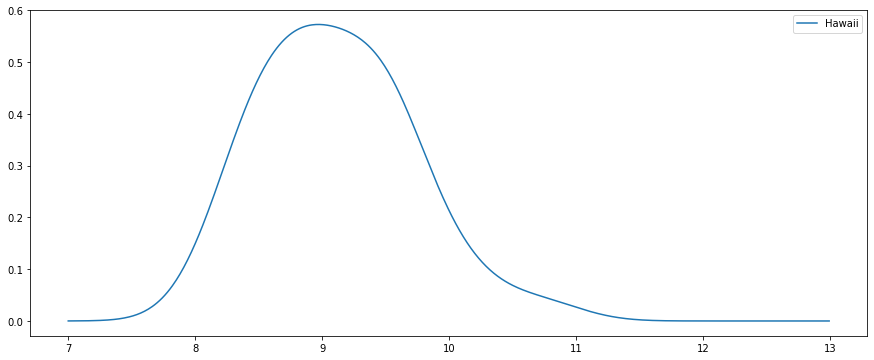

In [34]:
# Write your code here

log_avg_medicare_payment_hawaii = payment_data.loc[payment_data['state']=='HI']['log_avg_medicare_payment']
kde_hawaii = sp.stats.gaussian_kde(log_avg_medicare_payment_hawaii,bw_method = 0.5)
plt.figure(figsize = (15, 6))
xval = np.arange(7, 13,.01)
plt.plot(xval, kde_hawaii.evaluate(xval), label='Hawaii')
plt.legend()

### Interpreting the Hawaii Emprical Distribution

* According to the KDE plot above, what is the mean `avg_medicare_payment`? 
  * Plot the mean `avg_medicare_payment` and its density on your graph 


* Your graph should look like the one below     
  * Note that lines in the example below are intentionally drawn at a value that may be different from the true mean  
  * Make sure the vertical and horizontal lines in your graph match the mean and its density respectively
  

* Use the functions and `plt.vline` to plot the lines


<img src="https://www.dropbox.com/s/boiakmsgxw69z1r/interpreting_kde.png?dl=1" alt="drawing" style="width:800px;"/>

(6.5, 13.5)

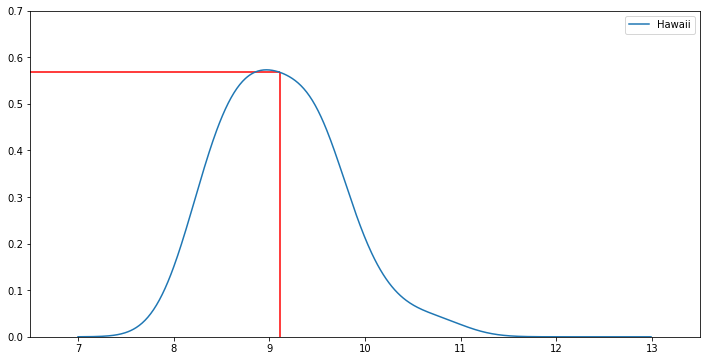

In [35]:
# Write your code here 

plt.figure(figsize = (12,6))
log_mean_hawaii = payment_data[payment_data["state"] == "HI"]['log_avg_medicare_payment'].mean()
plt.plot(xval, kde_hawaii.evaluate(xval), label='Hawaii')
plt.legend()

plt.vlines(np.mean(log_avg_medicare_payment_hawaii), 0, kde_hawaii.evaluate(np.mean(log_avg_medicare_payment_hawaii)), color='red')
plt.hlines(kde_hawaii.evaluate(np.mean(log_avg_medicare_payment_hawaii)), 6.5, np.mean(log_avg_medicare_payment_hawaii) , color='red')

plt.ylim(bottom = 0, top = 0.7)
plt.xlim(left = 6.5, right = 13.5)

### Interpreting the Hawaii Emprical Distribution

* According to the `KDE` plot above, what is the probability of observing an average payment greater than $25,000

  * The *KDE* object works in a similar fashion to any of the probability distributions in `scipy`
  
    * Note that what you are asked to compute here is not the density but the probability avg-payments > $25k
    
    * Since the total probability under the curve sums to 1, then the `avg_medicare_payment`  > $25k should be less than 1.
    
   * Also, recall that your payment values are log-transformed

* Use `matplotlib`'s `fill_between` to paint the area under the curve representing that area. 

In [36]:
# Write your code here

np.log(25000)

10.126631103850338

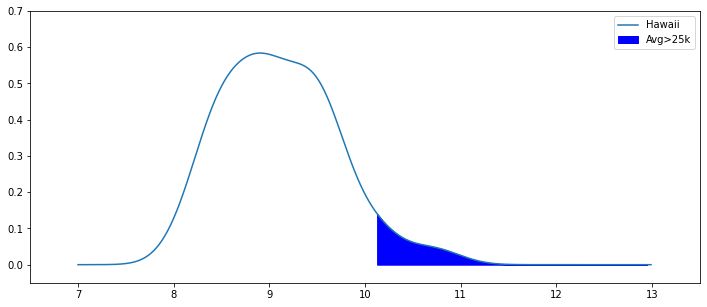

In [37]:
log_avg_payment_HI = payment_data[payment_data['state']=='HI']['log_avg_medicare_payment']

def EvalArea(sample, x):
    count = 0.0
    for i in sample:
        if i <= x:
            count += 1
    prob = count / len(sample)
    return prob

left = EvalArea(log_avg_payment_HI, np.log(25000))
right = 1 - left

plt.figure(figsize=(12,5))
kde_HI = sp.stats.gaussian_kde(log_avg_medicare_payment_hawaii, bw_method = 0.4)
plt.plot(xval, kde_HI.evaluate(xval), label = 'Hawaii')
x_adjust = np.arange(np.log(25000), max(xval), right)
plt.fill_between(x = x_adjust,  y1=0, y2=kde_HI.evaluate(x_adjust) ,color='b',label = 'Avg>25k')
plt.ylim(bottom = -0.05, top = 0.7)
plt.xlim(left = 6.5, right = 13.5)
plt.legend()

 ### Plotting Both KDEs   

* Plot the Hawaii and Idaho `log_avg_medicare_payment` distributions on the same plot

* Your plot should look like the following

<img src="https://www.dropbox.com/s/tej47hhhxc18tdd/both_kdes.png?dl=1" alt="drawing" style="width:700px;"/>


* Label the x-axis and y-axis and choose a title for your plot.

According to your plot, do you believe that the average payment across both states is different? Explain your answer.




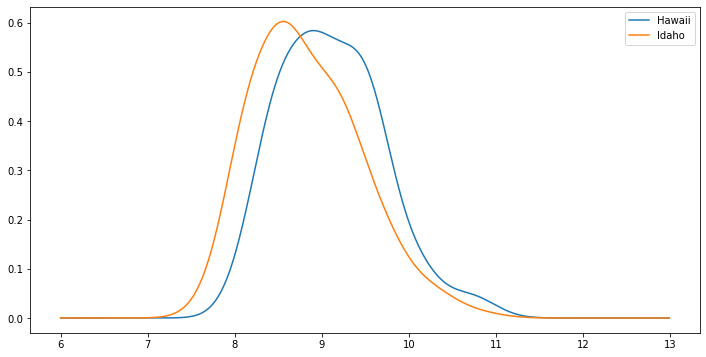

In [38]:
# Write your code here

plt.figure(figsize=(12,6))

data_idaho = payment_data.loc[payment_data['state']=='ID']['log_avg_medicare_payment']
data_hawaii = payment_data.loc[payment_data['state']=='HI']['log_avg_medicare_payment']
kde_ID = sp.stats.gaussian_kde(data_idaho, bw_method = 0.4)
kde_HI = sp.stats.gaussian_kde(data_hawaii, bw_method = 0.4)
x = np.arange(6, 13,.01)
plt.plot(x, kde_HI.evaluate(x),label='Hawaii')
plt.plot(x, kde_ID.evaluate(x),label='Idaho')
plt.legend()

### Hypothesis Testing

* Is there a statistically significant difference between Hawaii and Idaho in terms of log_avg_medicare_payment? Here are the hypotheses we will test:

* Null Hypothesis ($H_0$)
  * The mean values across both state are the same and any differenc is due to solely sampling

* Alternative Hypothesis ($H_A$)
  * The mean values across both state are different
    * The observed difference is not due to chance
    



### Exracting the Data

* First, we will combine the average Medicaid payments from both states into a single `numpy` `array` called `log_avg_medicare_payment_hi_id`. This will allow us to work with the data more easily.

  * Your `numpy` array should contain 993 entries


In [39]:
# Write your code here

log_avg_medicare_payment_hi_id = np.append(data_idaho, data_hawaii)
log_avg_medicare_payment_hi_id.shape

(993,)

### Computing the Observed Test Statistic

* Since we are interested in the difference between both averages, i.e., avg_medicare_payment in Hawaii and Idaho, a good test statistic is, therefore, the difference between the sample means in both states. 
* Compute the observed test statistic and save it to a variable called `observed_test_stat`

In [40]:
# Write your code here 

observed_test_stat = np.mean(data_hawaii) - np.mean(data_idaho)
observed_test_stat

0.2764453833037841

### Generating Data Under the Null Hypothesis: Single Iteration

* Under the null hypothesis, we assume that Hawaii and Idaho data come from the same distribution, and therefore, have the same parameters

* We can use permutations to simulate another set of samples from Hawaii and Idaho.

To generate data for a single iteration we will:

  1. Shuffle the values in `log_avg_medicare_payment_hi_id`
  2. Select two new samples to represent Hawaii and Idaho. The samples must have the same sizes as in the original data.
  3. Compute the difference between the mean `log_avg_medicare_payment` across both states.
  4. Store the value in a variable called `perm_diff`


In [41]:
# Write Your Code Here

np.random.shuffle(log_avg_medicare_payment_hi_id)
sample_hawaii = log_avg_medicare_payment_hi_id[0:data_hawaii.shape[0]]
sample_idaho = log_avg_medicare_payment_hi_id[data_hawaii.shape[0]:]
perm_diff = np.mean(sample_hawaii)-np.mean(sample_idaho)
print(perm_diff)

0.060685645474023886


* Repeat the process described above 5,000 times. In each iteration save the difference in means between the two bootstrapped datasets to an array called `perm_diffs`
* Plot the resulting distribution of the means 
  * You may use any plot type you deem appropriate for this use case
* Use `plt.scatter` to plot in red the observed test statistic

* The result should look "somewhat" like the graph below
<img src="https://www.dropbox.com/s/doln0egikkbar52/diff_hi_id.png?dl=1" alt="drawing" style="width:700px;"/>


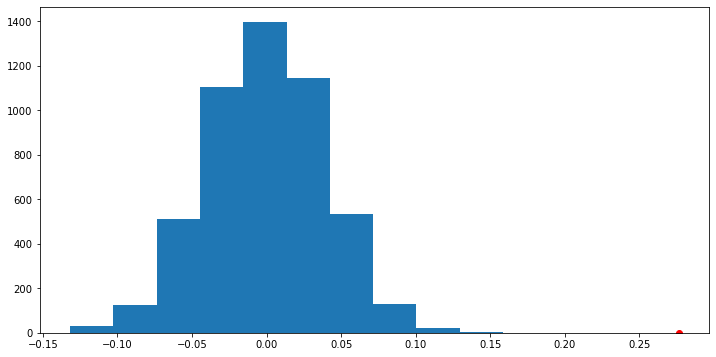

In [42]:
# Write you code here

perm_diffs = []

for i in range(5000):
    np.random.shuffle(log_avg_medicare_payment_hi_id)
    sample_hawaii = log_avg_medicare_payment_hi_id[0:data_hawaii.shape[0]]
    sample_idaho = log_avg_medicare_payment_hi_id[data_hawaii.shape[0]:]
    perm_diffs.append(np.mean(sample_hawaii)-np.mean(sample_idaho))
plt.figure(figsize=(12,6))
plt.hist(perm_diffs)
plt.scatter(observed_test_stat, 0, color='r')

### Computing the p-value for the test

* Compute the p-value associated with your test statistic and state whether you have ground to reject the null hypothesis.
  * Be sure to provide your `p-value` to justify your answer.

In [43]:
# Write you code here

p_value = sum(np.array(perm_diffs) > (observed_test_stat)) / len(perm_diffs)
p_value

0.0

In [44]:
# Write your answer here

### Hypothesis testing with values from DC

* Repeat the hypothesis test above by testing Hawaii and DC. Use the first cells below, to run your code and plot the empirical bootstrap distribution and the second to answer whether the data are statistically significantly similar or now. Include the `p-value` to support your conclusion

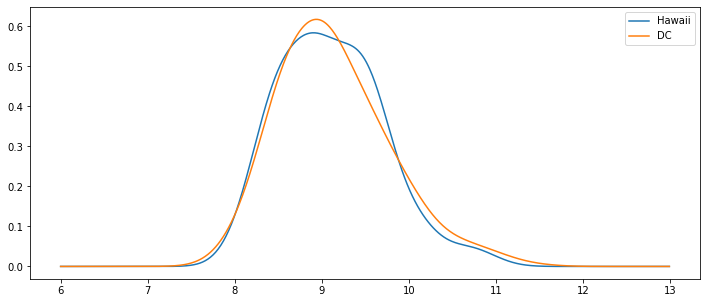

In [45]:
# Write you code here

data_dc = payment_data.loc[payment_data['state']=='DC']['log_avg_medicare_payment']
kde_DC = sp.stats.gaussian_kde(data_dc, bw_method = 0.4)
x = np.arange(6, 13,.01)
plt.figure(figsize=(12,5))
plt.plot(x, kde_HI.evaluate(x),label='Hawaii')
plt.plot(x, kde_DC.evaluate(x),label='DC')
plt.legend()

In [46]:
# Write your answer here

log_avg_medicare_payment_hi_dc = np.append(data_dc, data_hawaii)
log_avg_medicare_payment_hi_dc.shape

(904,)

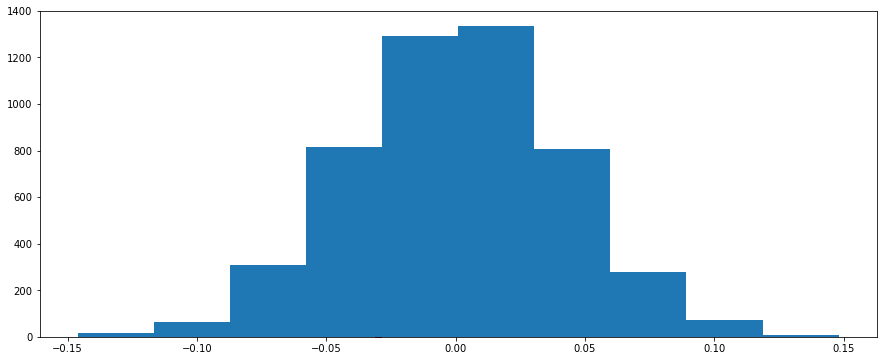

In [47]:
observed_test_stat_2 = np.mean(data_hawaii) - np.mean(data_dc)

perm_diffs_2 =[]
for i in range(5000):
    np.random.shuffle(log_avg_medicare_payment_hi_dc)
    sample_hawaii= log_avg_medicare_payment_hi_dc[0:data_hawaii.shape[0]]
    sample_dc= log_avg_medicare_payment_hi_dc[data_hawaii.shape[0]:]
    perm_diffs_2.append(np.mean(sample_hawaii)-np.mean(sample_dc))
plt.figure(figsize=(15,6))
plt.hist(perm_diffs_2)
plt.scatter(observed_test_stat_2, 0, color='r')

In [48]:
p_value_2 = sum(np.array(perm_diffs_2) > (observed_test_stat_2)) / len(perm_diffs_2)
p_value_2

0.7704